In [7]:
t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

Coding Exercise 1: Plotting a histogram
Plot an histogram of J=50 bins of N=10000 realizations of V(t) for t=tmax/10 and t=tmax.

We’ll make a small correction in the definition of t_range to ensure increments of dt by using np.arange instead of np.linspace.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# @title Figure settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")

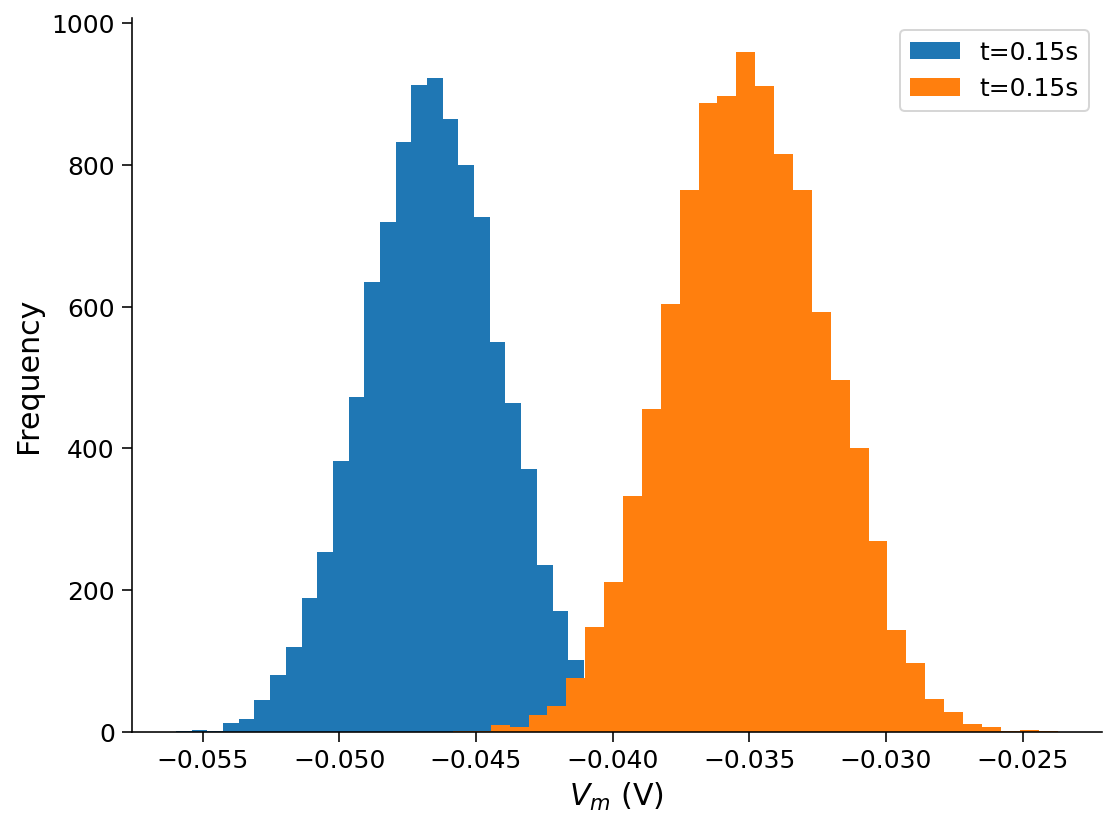

In [9]:
np.random.seed(2020)

t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 10000
v_n = el * np.ones([n, step_end])

i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * ( 2 * np.random.random([n, step_end]) - 1))
nbin = 32

for step, t in enumerate(t_range):
    
    if step == 0:
        continue
    
    v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r * i[:, step])
    
plt.figure()
plt.ylabel('Frequency')
plt.xlabel('$ V_m$ (V)')

# t_max/10
plt.hist(v_n [:, int(step_end / 10)],nbin, histtype='stepfilled', linewidth=0, 
         label = 't=' + str(t_max) + 's')

plt.hist(v_n [:, -1],nbin, histtype='stepfilled', linewidth=0, 
         label = 't=' + str(t_max) + 's')

plt.legend()
plt.show()

Coding Exercise 2: Adding spiking to the LIF neuron
Insert the reset condition, and collect the spike times of each realization in a dictionary variable spikes, with N=500.

We’ve used plt.plot for plotting lines and also for plotting dots at (x,y) coordinates, which is a scatter plot. From here on, we’ll use use plt.plot for plotting lines and for scatter plots: plt.scatter.

A raster plot represents spikes from multiple neurons by plotting dots at spike times from neuron j at plot height j.

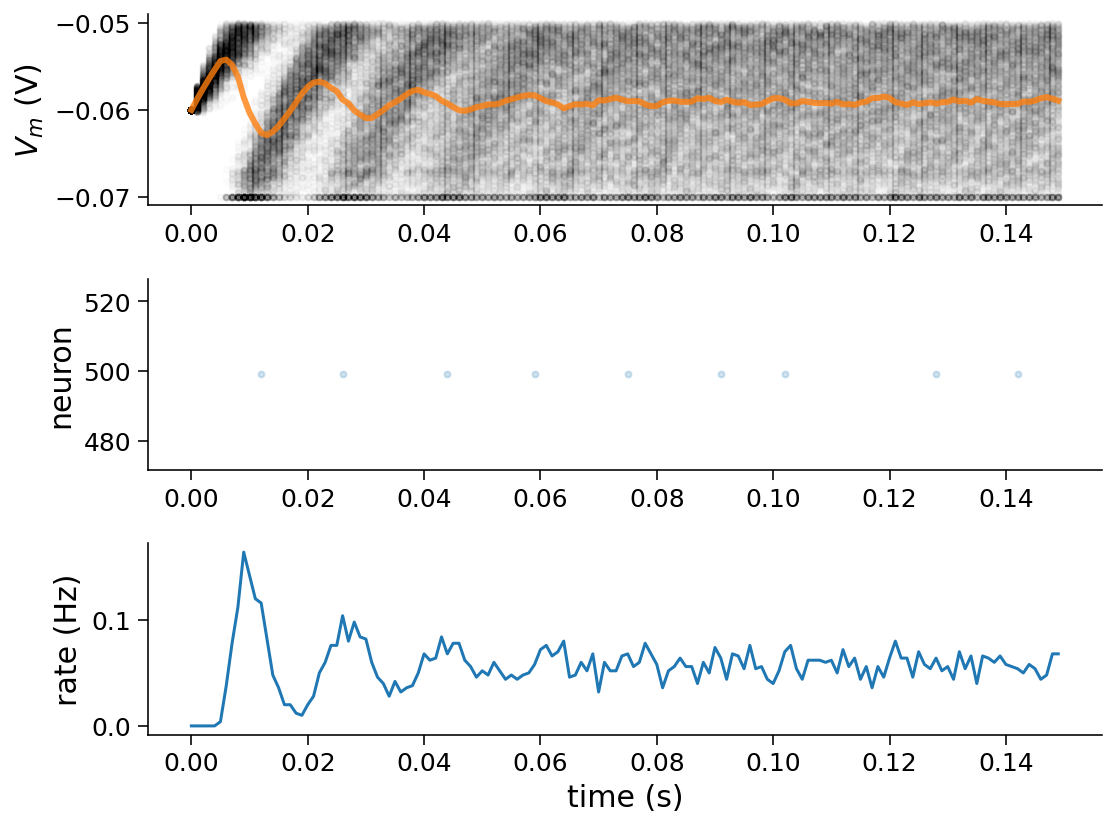

In [10]:
# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize spikes and spikes_n
spikes = {j: [] for j in range(n)}
spikes_n = np.zeros([step_end])

# Loop over time steps
for step, t in enumerate(t_range):

  # Skip first iteration
  if step==0:
    continue

  # Compute v_n
  v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r*i[:, step])

  # Loop over simulations
  for j in range(n):

    # Check if voltage above threshold
    if v_n[j, step] >= vth:

      # Reset to reset voltage
      v_n[j, step] = vr

      # Add this spike time
      spikes[j] += [t]

      # Add spike count to this step
      spikes_n[step] += 1

# Collect mean Vm and mean spiking rate
v_mean = np.mean(v_n, axis=0)
spikes_mean =  spikes_n / n


  # Initialize the figure
plt.figure()

  # Plot simulations and sample mean
ax1 = plt.subplot(3, 1, 1)
for j in range(n):
    plt.scatter(t_range, v_n[j], color="k", marker=".", alpha=0.01)
plt.plot(t_range, v_mean, 'C1', alpha=0.8, linewidth=3)
plt.ylabel('$V_m$ (V)')

  # Plot spikes
plt.subplot(3, 1, 2, sharex=ax1)
  # for each neuron j: collect spike times and plot them at height j
for j in range(n):
     times = np.array(spikes[j])
plt.scatter(times, j * np.ones_like(times), color="C0", marker=".", alpha=0.2)

plt.ylabel('neuron')

  # Plot firing rate
plt.subplot(3, 1, 3, sharex=ax1)
plt.plot(t_range, spikes_mean)
plt.xlabel('time (s)')
plt.ylabel('rate (Hz)')

plt.tight_layout()

Coding Exercise 3: Using Boolean indexing
We can avoid looping all neurons in each time step by identifying with boolean arrays the indexes of neurons that spiked in the previous step.

In the example below, v_rest is a boolean numpy array with True in each index of v_n with value vr at time index step:

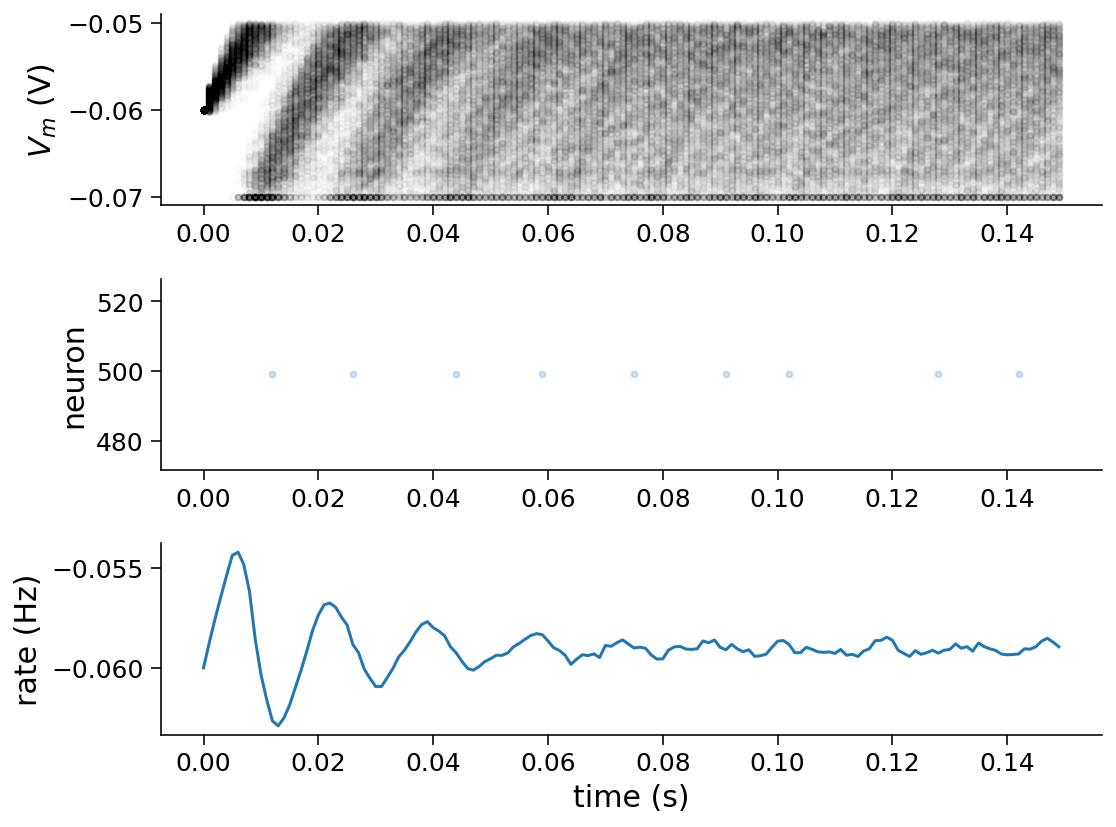

In [11]:
# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize spikes and spikes_n
spikes = {j: [] for j in range(n)}
spikes_n = np.zeros([step_end])

# Loop over time steps
for step, t in enumerate(t_range):

  # Skip first iteration
  if step == 0:
    continue

  # Compute v_n
  v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r*i[:, step])

  # Initialize boolean numpy array `spiked` with v_n > v_thr
  spiked = (v_n[:,step] >= vth)

  # Set relevant values of v_n to resting potential using spiked
  v_n[spiked,step] = vr

  # Collect spike times
  for j in np.where(spiked)[0]:
    spikes[j] += [t]
    spikes_n[step] += 1

# Collect mean spiking rate
spikes_mean = spikes_n / n

  # Initialize the figure
plt.figure()

  # Plot simulations and sample mean
ax1 = plt.subplot(3, 1, 1)
for j in range(n):
    plt.scatter(t_range, v_n[j], color="k", marker=".", alpha=0.01)
plt.ylabel('$V_m$ (V)')

  # Plot spikes
plt.subplot(3, 1, 2, sharex=ax1)
  # for each neuron j: collect spike times and plot them at height j
for j in range(n):
     times = np.array(spikes[j])
plt.scatter(times, j * np.ones_like(times), color="C0", marker=".", alpha=0.2)

plt.ylabel('neuron')

  # Plot firing rate
plt.subplot(3, 1, 3, sharex=ax1)
plt.plot(t_range, v_mean)
plt.xlabel('time (s)')
plt.ylabel('rate (Hz)')

plt.tight_layout()


Coding Exercise 4: Making a binary raster plot
A binary raster plot represents spike times as 1s in a binary grid initialized with 0s. We start with a numpy array raster of zeros with shape (neurons, time steps), and represent a spike from neuron 5 at time step 20 as raster(5,20)=1, for example.

The binary raster plot is much more efficient than the previous method by plotting the numpy array raster as an image:

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

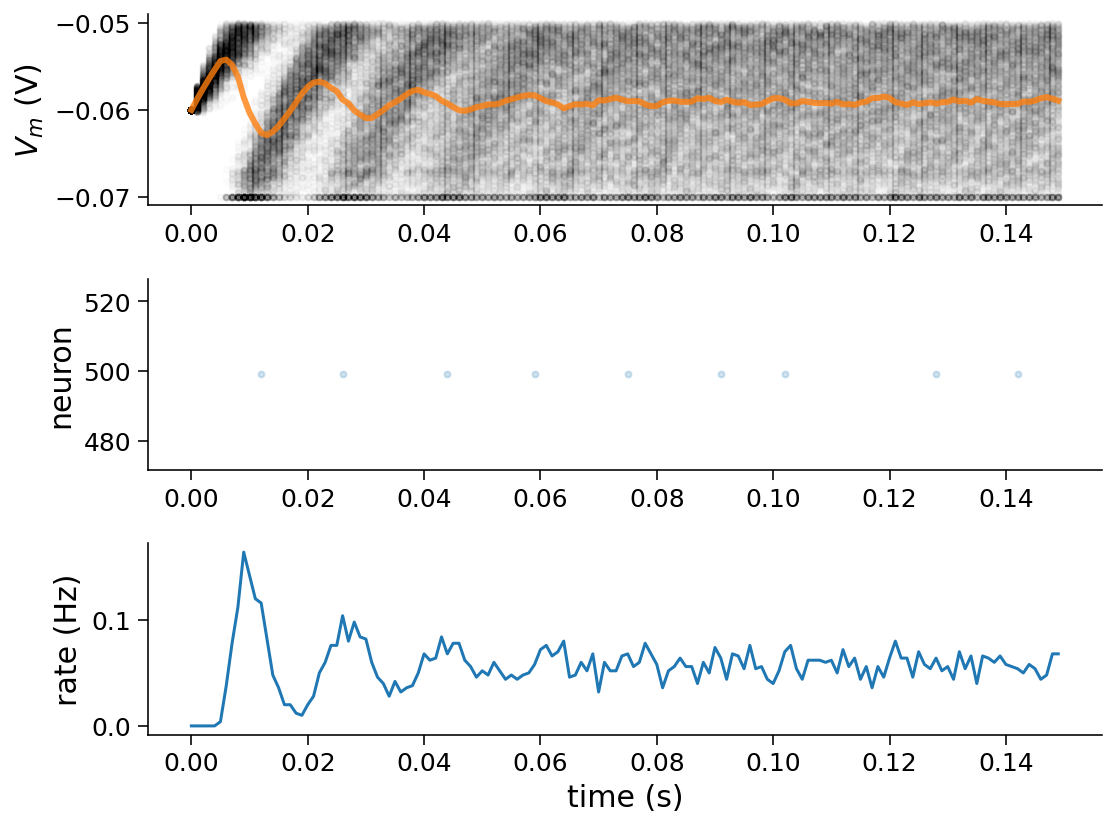

In [12]:

# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize binary numpy array for raster plot
raster = np.zeros([n,step_end])

# Loop over time steps
for step, t in enumerate(t_range):

  # Skip first iteration
  if step==0:
    continue

  # Compute v_n
  v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r*i[:, step])

  # Initialize boolean numpy array `spiked` with v_n > v_thr
  spiked = (v_n[:,step] >= vth)

  # Set relevant values of v_n to v_reset using spiked
  v_n[spiked,step] = vr

  # Set relevant elements in raster to 1 using spiked
  raster[spiked,step] = 1.
print(raster[:,5])
  # Initialize the figure
plt.figure()

  # Plot simulations and sample mean
ax1 = plt.subplot(3, 1, 1)
for j in range(n):
    plt.scatter(t_range, v_n[j], color="k", marker=".", alpha=0.01)
plt.plot(t_range, v_mean, 'C1', alpha=0.8, linewidth=3)
plt.ylabel('$V_m$ (V)')

  # Plot spikes
plt.subplot(3, 1, 2, sharex=ax1)
  # for each neuron j: collect spike times and plot them at height j
for j in range(n):
     times = np.array(spikes[j])
plt.scatter(times, j * np.ones_like(times), color="C0", marker=".", alpha=0.2)

plt.ylabel('neuron')

  # Plot firing rate
plt.subplot(3, 1, 3, sharex=ax1)
plt.plot(t_range, spikes_mean)
plt.xlabel('time (s)')
plt.ylabel('rate (Hz)')

plt.tight_layout()

The absolute refractory period is a time interval in the order of a few milliseconds during which synaptic input will not lead to a 2nd spike, no matter how strong. This effect is due to the biophysics of the neuron membrane channels

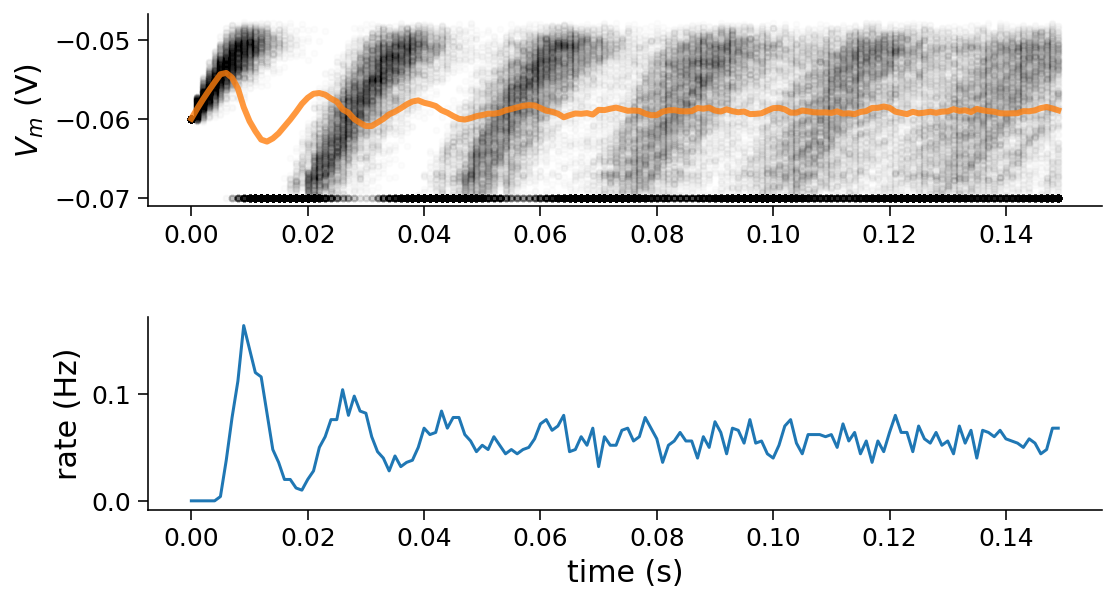

In [24]:
# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize spikes and spikes_n
spikes = {j: [] for j in range(n)}
spikes_n = np.zeros([step_end])

t_ref = 0.01
last_spike = -t_ref * np.ones([n])

# Loop over time steps
for step, t in enumerate(t_range):

  # Skip first iteration
  if step == 0:
    continue

  # Compute v_n
  v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r*i[:, step])

 # Initialize boolean numpy array `spiked` with v_n > v_thr
  spiked = (v_n[:,step] >= vth)

  # Set relevant elements in raster to 1 using spiked
  raster[spiked,step] = 1.

  # Initialize boolean numpy array clamped using last_spike, t and t_ref
  clamped = (last_spike + t_ref > t)

  # Reset clamped neurons to vr using clamped
  v_n[clamped,step] = vr

  # Update numpy array last_spike with time t for spiking neurons
  last_spike[spiked] = t
  
plt.figure()

  # Plot simulations and sample mean
ax1 = plt.subplot(3, 1, 1)
for j in range(n):
    plt.scatter(t_range, v_n[j], color="k", marker=".", alpha=0.01)
plt.plot(t_range, v_mean, 'C1', alpha=0.8, linewidth=3)
plt.ylabel('$V_m$ (V)')

  # Plot spikes
plt.subplot(3, 1, 2, sharex=ax1)
  # for each neuron j: collect spike times and plot them at height j
for j in range(n):
     times = np.array(spikes[j])
plt.scatter(times, j * np.ones_like(times), color="C0", marker=".", alpha=0.)

plt.ylabel('neuron')

 
plt.tight_layout()

plt.plot(t_range, spikes_mean)
plt.xlabel('time (s)')
plt.ylabel('rate (Hz)')
plt.show()

Random refractory period
In the following interactive demo, we will investigate the effect of random refractory periods. We will use random refactory periods tref with tref=μ+σN, where N is the normal distribution, μ=0.01 and σ=0.007.

Refractory period samples t_ref of size n is initialized with np.random.normal. We clip negative values to 0 with boolean indexes. (Why?) You can double click the cell to see the hidden code.

You can play with the parameters mu and sigma and visualize the resulting simulation. What is the effect of different σ values?

Execute this cell to enable the demo

 Rewriting code with functions
We will now re-organize parts of the code from the previous exercise with functions. You need to complete the function spike_clamp() to update V(t) and deal with spiking and refractoriness

In [1]:
def ode_step(v, i, dt):
  """
  Evolves membrane potential by one step of discrete time integration

  Args:
    v (numpy array of floats)
      membrane potential at previous time step of shape (neurons)

    v (numpy array of floats)
      synaptic input at current time step of shape (neurons)

    dt (float)
      time step increment

  Returns:
    v (numpy array of floats)
      membrane potential at current time step of shape (neurons)
  """
  v = v + dt/tau * (el - v + r*i)

  return v

# to_remove solution
def spike_clamp(v, delta_spike):
  """
  Resets membrane potential of neurons if v>= vth
  and clamps to vr if interval of time since last spike < t_ref

  Args:
    v (numpy array of floats)
      membrane potential of shape (neurons)

    delta_spike (numpy array of floats)
      interval of time since last spike of shape (neurons)

  Returns:
    v (numpy array of floats)
      membrane potential of shape (neurons)
    spiked (numpy array of floats)
      boolean array of neurons that spiked  of shape (neurons)
  """

  # Boolean array spiked indexes neurons with v>=vth
  spiked = (v >= vth)
  v[spiked] = vr

  # Boolean array clamped indexes refractory neurons
  clamped = (t_ref > delta_spike)
  v[clamped] = vr

  return v, spiked


# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize binary numpy array for raster plot
raster = np.zeros([n,step_end])

# Initialize t_ref and last_spike
mu = 0.01
sigma = 0.007
t_ref = mu + sigma*np.random.normal(size=n)
t_ref[t_ref<0] = 0
last_spike = -t_ref * np.ones([n])

# Loop over time steps
for step, t in enumerate(t_range):

  # Skip first iteration
  if step==0:
    continue

  # Compute v_n
  v_n[:,step] = ode_step(v_n[:,step-1], i[:,step], dt)

  # Reset membrane potential and clamp
  v_n[:,step], spiked = spike_clamp(v_n[:,step], t - last_spike)

  # Update raster and last_spike
  raster[spiked,step] = 1.
  last_spike[spiked] = t
  # Plot simulations and sample mean
ax1 = plt.subplot(3, 1, 1)
for j in range(n):
    plt.scatter(t_range, v_n[j], color="k", marker=".", alpha=0.01)
plt.plot(t_range, v_mean, 'C1', alpha=0.8, linewidth=3)
plt.ylabel('$V_m$ (V)')

  # Plot spikes
plt.subplot(3, 1, 2, sharex=ax1)
  # for each neuron j: collect spike times and plot them at height j
for j in range(n):
     times = np.array(spikes[j])
plt.scatter(times, j * np.ones_like(times), color="C0", marker=".", alpha=0.2)

plt.ylabel('neuron')

# Plot firing rate
plt.subplot(3, 1, 3, sharex=ax1)
plt.plot(t_range, spikes_mean)
plt.xlabel('time (s)')
plt.ylabel('rate (Hz)')

plt.tight_layout()


NameError: name 'np' is not defined